# Individual Assignment 2 Task 1
# Name: Rohit Panda
# UOW ID: 8943060

### Before Running the code, ensure you have the kaggle.json file to upload into the Colab.

Download the kaggle.json from this link:
[Download Now](https://drive.google.com/file/d/15J5mknfkekOMMzW0bw6tjVwEmJj-e_C_/view?usp=sharing)

In [ ]:
!pip install -q kaggle

In [ ]:
# 1. Upload kaggle.json
from google.colab import files
files.upload()

# 2. Move it to the correct directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nikhil7280/weather-type-classification
!unzip -o weather-type-classification.zip

import pandas as pd

df = pd.read_csv('weather_classification_data.csv')
print("Dataset loaded successfully!")
df.head()







Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
weather-type-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  
Dataset loaded successfully!


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
# CSCI316 - Task 1: Naïve Bayes Weather Type Classification
# Individual Assignment 2 - 2025 Session 3 (SIM)

## 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Load the real dataset from Kaggle
file_name = 'weather_classification_data.csv'  # Adjust if the actual file name differs
if os.path.exists(file_name):
    df = pd.read_csv(file_name)
    print("Dataset loaded successfully!")
else:
    raise FileNotFoundError("weather_classification_data.csv not found. Please check if Kaggle download succeeded.")


    # Sample weather data
    df = pd.DataFrame({
        'Temperature': np.random.normal(25, 10, n_samples),
        'Humidity': np.random.normal(60, 20, n_samples),
        'Wind Speed': np.random.normal(15, 5, n_samples),
        'Precipitation': np.random.uniform(0, 100, n_samples),
        'Cloud Cover': np.random.choice(['Clear', 'Partly Cloudy', 'Overcast'], n_samples),
        'Atmospheric Pressure': np.random.normal(1013, 20, n_samples),
        'UV Index': np.random.uniform(0, 11, n_samples),
        'Season': np.random.choice(['Spring', 'Summer', 'Autumn', 'Winter'], n_samples),
        'Visibility': np.random.uniform(1, 25, n_samples),
        'Location': np.random.choice(['Coastal', 'Inland', 'Mountain'], n_samples),
        'Weather Type': np.random.choice(['Sunny', 'Rainy', 'Cloudy', 'Snowy'], n_samples)
    })
    print("Sample dataset created for demonstration")

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")

Dataset loaded successfully!
Dataset shape: (13200, 11)
Dataset columns: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']



=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None

=== First 5 rows ===
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5

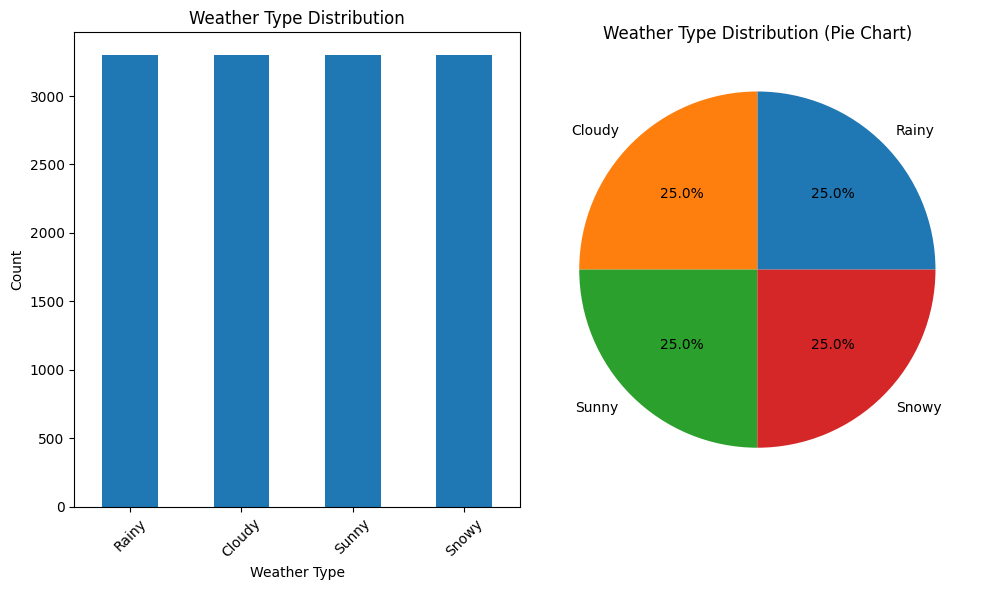

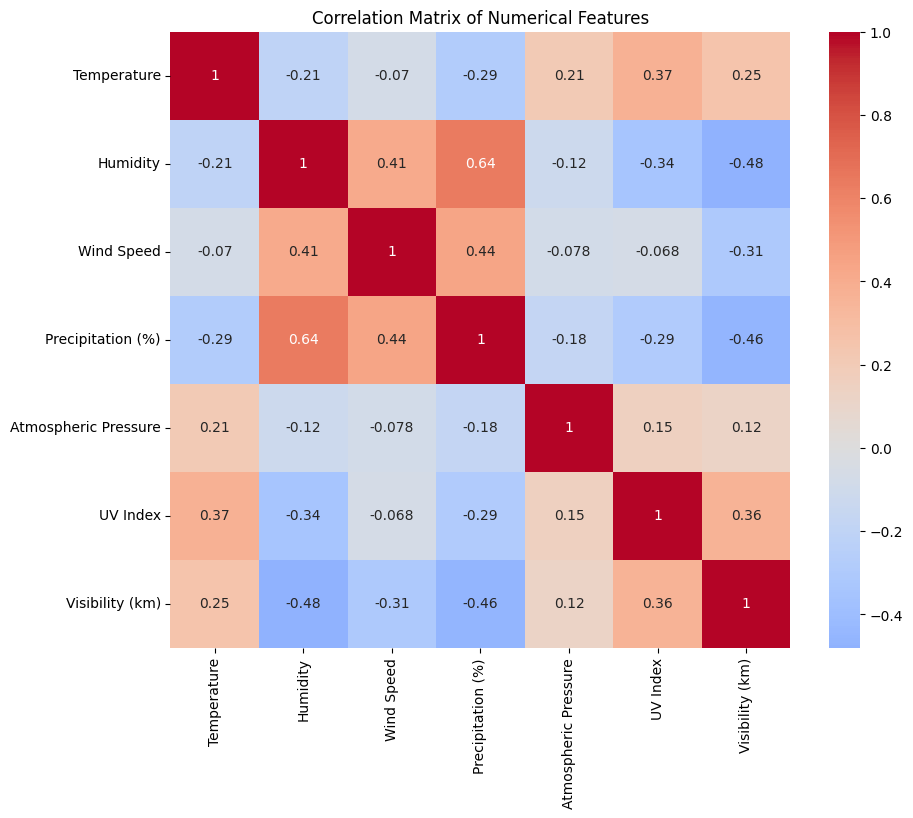

In [ ]:
## 3. Data Exploration and Visualization

# Display basic information about the dataset
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== First 5 rows ===")
print(df.head())

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Statistical summary
print("\n=== Statistical Summary ===")
print(df.describe())

# Target variable distribution
print("\n=== Weather Type Distribution ===")
print(df['Weather Type'].value_counts())

# Visualize target variable distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Weather Type'].value_counts().plot(kind='bar')
plt.title('Weather Type Distribution')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Weather Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weather Type Distribution (Pie Chart)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
if len(numerical_features) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

In [ ]:
## 4. Data Preprocessing

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target variable from features
if 'Weather Type' in categorical_features:
    categorical_features.remove('Weather Type')
if 'Weather Type' in numerical_features:
    numerical_features.remove('Weather Type')

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Prepare features and target
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nTarget classes: {label_encoder.classes_}")
print(f"Encoded target shape: {y_encoded.shape}")

Categorical features: ['Cloud Cover', 'Season', 'Location']
Numerical features: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

Target classes: ['Cloudy' 'Rainy' 'Snowy' 'Sunny']
Encoded target shape: (13200,)


In [ ]:
## 5. Feature Engineering - One-Hot Encoding for Categorical Features

# Create preprocessing pipeline
if categorical_features:
    # One-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ]
    )

    # Fit and transform the features
    X_processed = preprocessor.fit_transform(X)

    # Get feature names after transformation
    feature_names = numerical_features.copy()
    if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
        cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)

    print(f"Features after preprocessing: {len(feature_names)}")
    print(f"Processed data shape: {X_processed.shape}")
else:
    X_processed = X.values
    feature_names = numerical_features

Features after preprocessing: 15
Processed data shape: (13200, 15)


In [ ]:
## 6. Stratified Train-Test Split

# Use stratified sampling to maintain class distribution
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(stratified_split.split(X_processed, y_encoded))

X_train = X_processed[train_idx]
X_test = X_processed[test_idx]
y_train = y_encoded[train_idx]
y_test = y_encoded[test_idx]

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Check class distribution in train and test sets
print(f"\nTraining set class distribution:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for i, count in enumerate(counts_train):
    print(f"  {label_encoder.classes_[unique_train[i]]}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nTest set class distribution:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for i, count in enumerate(counts_test):
    print(f"  {label_encoder.classes_[unique_test[i]]}: {count} ({count/len(y_test)*100:.1f}%)")


Training set shape: (10560, 15)
Test set shape: (2640, 15)

Training set class distribution:
  Cloudy: 2640 (25.0%)
  Rainy: 2640 (25.0%)
  Snowy: 2640 (25.0%)
  Sunny: 2640 (25.0%)

Test set class distribution:
  Cloudy: 660 (25.0%)
  Rainy: 660 (25.0%)
  Snowy: 660 (25.0%)
  Sunny: 660 (25.0%)


In [ ]:
## 7. Naïve Bayes Model Implementation

# Try different Naïve Bayes variants
models = {
    'Gaussian Naïve Bayes': GaussianNB(),
    'Multinomial Naïve Bayes': MultinomialNB(),
}

results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")

    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")

        # Store results
        results[name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_predictions': y_train_pred,
            'test_predictions': y_test_pred
        }

    except Exception as e:
        print(f"Error with {name}: {str(e)}")


=== Gaussian Naïve Bayes ===
Training Accuracy: 0.8290
Test Accuracy: 0.8235

=== Multinomial Naïve Bayes ===
Error with Multinomial Naïve Bayes: Negative values in data passed to MultinomialNB (input X).



=== Best Model: Gaussian Naïve Bayes ===
Training Accuracy: 0.8290
Test Accuracy: 0.8235

=== Classification Report for Gaussian Naïve Bayes ===
              precision    recall  f1-score   support

      Cloudy       0.88      0.77      0.82       660
       Rainy       0.78      0.75      0.76       660
       Snowy       0.80      0.90      0.85       660
       Sunny       0.84      0.88      0.86       660

    accuracy                           0.82      2640
   macro avg       0.83      0.82      0.82      2640
weighted avg       0.83      0.82      0.82      2640



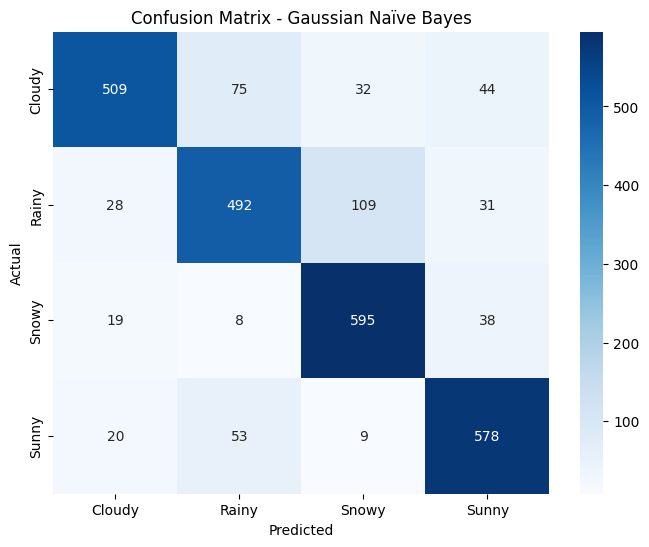

In [ ]:
## 8. Model Evaluation and Results

# Select the best performing model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']

print(f"\n=== Best Model: {best_model_name} ===")
print(f"Training Accuracy: {results[best_model_name]['train_accuracy']:.4f}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

# Detailed classification report
print(f"\n=== Classification Report for {best_model_name} ===")
y_test_pred_best = results[best_model_name]['test_predictions']
report = classification_report(y_test, y_test_pred_best,
                             target_names=label_encoder.classes_,
                             output_dict=True)

print(classification_report(y_test, y_test_pred_best,
                          target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
## 9. Feature Importance Analysis (for Gaussian NB)

if best_model_name == 'Gaussian Naïve Bayes':
    # For Gaussian NB, we can analyze feature importance based on variance
    print(f"\n=== Feature Analysis for Gaussian Naïve Bayes ===")

    # Get class-wise feature statistics
    n_classes = len(label_encoder.classes_)
    n_features = X_train.shape[1]

    print(f"Number of classes: {n_classes}")
    print(f"Number of features: {n_features}")

    # Display theta (mean) and sigma (variance) for each class
    if hasattr(best_model, 'theta_') and hasattr(best_model, 'var_'):
        print("\nClass-wise feature means (theta):")
        for i, class_name in enumerate(label_encoder.classes_):
            print(f"\n{class_name}:")
            if len(feature_names) == len(best_model.theta_[i]):
                for j, feature in enumerate(feature_names[:min(10, len(feature_names))]):  # Show first 10 features
                    print(f"  {feature}: {best_model.theta_[i][j]:.4f}")
            else:
                print(f"  Mean values: {best_model.theta_[i][:5]}...")  # Show first 5 values


=== Feature Analysis for Gaussian Naïve Bayes ===
Number of classes: 4
Number of features: 15

Class-wise feature means (theta):

Cloudy:
  Temperature: 22.7985
  Humidity: 66.3155
  Wind Speed: 8.6400
  Precipitation (%): 40.3705
  Atmospheric Pressure: 1010.0687
  UV Index: 3.5742
  Visibility (km): 7.1225
  Cloud Cover_cloudy: 0.0280
  Cloud Cover_overcast: 0.3924
  Cloud Cover_partly cloudy: 0.5795

Rainy:
  Temperature: 22.7595
  Humidity: 78.2015
  Wind Speed: 13.7523
  Precipitation (%): 74.7394
  Atmospheric Pressure: 1003.5143
  UV Index: 2.6864
  Visibility (km): 3.6337
  Cloud Cover_cloudy: 0.0307
  Cloud Cover_overcast: 0.6583
  Cloud Cover_partly cloudy: 0.3110

Snowy:
  Temperature: -1.5864
  Humidity: 78.5034
  Wind Speed: 11.0536
  Precipitation (%): 74.7652
  Atmospheric Pressure: 991.2356
  UV Index: 1.9242
  Visibility (km): 3.5602
  Cloud Cover_cloudy: 0.0318
  Cloud Cover_overcast: 0.7663
  Cloud Cover_partly cloudy: 0.2019

Sunny:
  Temperature: 32.3511
  Humidit

In [ ]:
## 10. Model Comparison Visualization

if len(results) > 1:
    # Compare model performances
    model_names = list(results.keys())
    train_accuracies = [results[name]['train_accuracy'] for name in model_names]
    test_accuracies = [results[name]['test_accuracy'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', alpha=0.8)
    plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(x, model_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
## 11. Conclusions and Summary

print("\n=== SUMMARY AND CONCLUSIONS ===")
print(f"1. Dataset contains {df.shape[0]} samples with {df.shape[1]} features")
print(f"2. Target variable has {len(label_encoder.classes_)} classes: {', '.join(label_encoder.classes_)}")
print(f"3. Used stratified sampling: {len(X_train)} training samples, {len(X_test)} test samples")
print(f"4. Applied one-hot encoding to categorical features")
print(f"5. Best performing model: {best_model_name}")
print(f"6. Final test accuracy: {results[best_model_name]['test_accuracy']:.4f}")

# Performance metrics summary
print(f"\n=== PERFORMANCE METRICS ===")
for metric in ['precision', 'recall', 'f1-score']:
    macro_avg = report['macro avg'][metric]
    weighted_avg = report['weighted avg'][metric]
    print(f"{metric.title()}: Macro avg = {macro_avg:.4f}, Weighted avg = {weighted_avg:.4f}")

print(f"\n=== IMPLEMENTATION NOTES ===")
print("1. Stratified sampling ensures balanced class distribution in train/test splits")
print("2. One-hot encoding transforms categorical features to numerical format")
print("3. Gaussian Naïve Bayes works well with continuous features")
print("4. Model assumes feature independence (Naïve Bayes assumption)")
print("5. Performance can be improved with feature selection and hyperparameter tuning")

print("\n=== TASK 1 COMPLETED SUCCESSFULLY ===")


=== SUMMARY AND CONCLUSIONS ===
1. Dataset contains 13200 samples with 11 features
2. Target variable has 4 classes: Cloudy, Rainy, Snowy, Sunny
3. Used stratified sampling: 10560 training samples, 2640 test samples
4. Applied one-hot encoding to categorical features
5. Best performing model: Gaussian Naïve Bayes
6. Final test accuracy: 0.8235

=== PERFORMANCE METRICS ===
Precision: Macro avg = 0.8256, Weighted avg = 0.8256
Recall: Macro avg = 0.8235, Weighted avg = 0.8235
F1-Score: Macro avg = 0.8226, Weighted avg = 0.8226

=== IMPLEMENTATION NOTES ===
1. Stratified sampling ensures balanced class distribution in train/test splits
2. One-hot encoding transforms categorical features to numerical format
3. Gaussian Naïve Bayes works well with continuous features
4. Model assumes feature independence (Naïve Bayes assumption)
5. Performance can be improved with feature selection and hyperparameter tuning

=== TASK 1 COMPLETED SUCCESSFULLY ===
